In [130]:
from sklearn.feature_extraction.text import CountVectorizer
import os
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
path = "../data/large_data/populis_conc5/"
filenames = [path + f for f in os.listdir(path) if ".txt" in f]
filenames[:10]

['../data/large_data/populis_conc5/populis_conc5_pop_id_5.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_524.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_75.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_242.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_256.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_61.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_518.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_49.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_281.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_295.txt']

In [115]:
n = 10000
vectorizer = CountVectorizer(input="filename", max_features=n, stop_words="left")
X = vectorizer.fit_transform(filenames)

In [116]:
vocab_dict = vectorizer.vocabulary_

In [117]:
vocab_dict["populist"]

6392

In [118]:
vocab_dict["populism"]


6361

In [119]:
#X[:,6392].sum()

In [120]:
#X[:,6361].sum()


In [121]:
[w for w in vocab_dict.keys() if "centr" in w]

['centralized',
 'central',
 'centrally',
 'concentrate',
 'centre',
 'centrist',
 'east_central_europe',
 'from_competition_to_polarization_in_central_europe_',
 'central_european',
 'thincentre',
 'centrism',
 'concentration',
 'central_europe',
 'centrality',
 'concentrated',
 'peoplecentrism',
 'centric',
 'ethnocentric',
 'centralize',
 'central_and_eastern_europe',
 'centralization',
 'ecocentrism',
 'ethnocentrism',
 'the_central_bank',
 'decentralization',
 'ofcentre',
 'eurocentric']

In [122]:
for w in [w for w in vocab_dict.keys() if "left" in w]:
    print(w, X[:,vocab_dict[w]].sum())


left 1854
_flanking_on_the_left_and_right 4
leftwe 56
leftist 189
leftpopulist 5
leftand 8
leftwing 2
the_left_alliance 2
the_coalition_of_the_radical_left 2
leftmaidan 3
leftright 4
the_populist_radical_left_ 4
the_populist_radical_left_direction 5
the_levers_of_the_left_ 2
leftism 4
leftists 2
leftpopulism 2


In [123]:
for w in [w for w in vocab_dict.keys() if "right" in w]:
    print(w, X[:,vocab_dict[w]].sum())

right 4524
rightwe 165
_flanking_on_the_left_and_right 4
rightly 18
the_comparative_linguistic_simplicity_of_right_ 3
rightful 9
rightsoriente 2
rightwing 9
rightfully 3
outright 14
rightist 61
rights 3
the_challenge_of_right_ 3
radicalright 7
rightpopulist 7
the_populist_radical_right_parties 2
righteous 3
rightward 5
the_radical_right_hypothesis 2
the_populist_radical_right 6
farright 4
leftright 4
pretreatmentpopulistsintherightpanel 2
the_populist_radical_and_right 2
ʻright 2


In [124]:
X[:,vocab_dict["left"]].sum()

1854

In [125]:
X[:,vocab_dict["centrist"]].sum()

50

In [126]:
X[:,vocab_dict["centrism"]].sum()

81

In [127]:
X[:,vocab_dict["technocratic"]].sum()

159

In [81]:
svd = TruncatedSVD(n_components=300, n_iter=10, random_state=0)
X_svd = svd.fit_transform(X)
X_svd

array([[ 1.84133316e+01,  9.54263091e+00, -4.88758127e+00, ...,
         1.19082668e+00,  5.05376120e-01, -4.29884995e-01],
       [ 1.26798516e+02, -3.45447161e+01,  3.11342047e+01, ...,
        -1.76150541e-01, -6.51153400e-02, -1.08641293e-01],
       [ 3.52569574e+00,  1.75398374e+00,  7.65009774e-01, ...,
         2.97016312e-02, -2.71483353e-01, -2.11958475e-02],
       ...,
       [ 7.27962383e+01,  1.94606401e+01,  2.19154560e+01, ...,
        -4.64330313e-01, -1.74304727e-01,  2.37428653e-01],
       [ 1.41004999e+02,  4.27279553e+00,  3.39285393e+01, ...,
        -3.54215464e-01,  2.98682863e-01,  3.75313295e-01],
       [ 1.32729903e+01,  4.47197167e+00, -1.18010500e+00, ...,
         3.72170655e-01, -2.04619325e+00,  8.89985986e-02]])

In [128]:
X_svd.shape

(537, 300)

In [129]:
X_sim = cosine_similarity(X_svd)

In [89]:
X_sim.shape

(537, 537)

In [132]:
pd.DataFrame(X_sim, columns=[filename.rpartition("/")[2] for filename in filenames],  index=[filename.rpartition("/")[2] for filename in filenames])

,populis_conc5_pop_id_5.txt,populis_conc5_pop_id_524.txt,populis_conc5_pop_id_75.txt,populis_conc5_pop_id_242.txt,populis_conc5_pop_id_256.txt,populis_conc5_pop_id_61.txt,populis_conc5_pop_id_518.txt,populis_conc5_pop_id_49.txt,populis_conc5_pop_id_281.txt,populis_conc5_pop_id_295.txt,...,populis_conc5_pop_id_298.txt,populis_conc5_pop_id_515.txt,populis_conc5_pop_id_273.txt,populis_conc5_pop_id_44.txt,populis_conc5_pop_id_50.txt,populis_conc5_pop_id_267.txt,populis_conc5_pop_id_501.txt,populis_conc5_pop_id_529.txt,populis_conc5_pop_id_78.txt,populis_conc5_pop_id_8.txt
populis_conc5_pop_id_5.txt,1.000000,0.462212,0.605755,0.033923,0.709563,0.585185,0.229301,0.688969,0.359526,0.636288,...,0.342221,0.173671,0.491054,0.0,0.803629,0.786041,0.348492,0.580607,0.593550,0.764263
populis_conc5_pop_id_524.txt,0.462212,1.000000,0.414909,0.274858,0.470001,0.449412,0.503028,0.580321,0.612495,0.647006,...,0.561194,0.561514,0.596039,0.0,0.483989,0.523136,0.611328,0.535660,0.618598,0.487925
populis_conc5_pop_id_75.txt,0.605755,0.414909,1.000000,0.102162,0.404719,0.710787,0.140570,0.684003,0.323738,0.480541,...,0.159860,0.179982,0.472520,0.0,0.578629,0.661104,0.280409,0.509558,0.476935,0.480244
populis_conc5_pop_id_242.txt,0.033923,0.274858,0.102162,1.000000,0.131247,0.019424,0.290040,0.080341,0.336838,0.264685,...,0.428721,0.368620,0.188836,0.0,0.053917,0.163848,0.444503,0.268553,0.179023,0.063564
populis_conc5_pop_id_256.txt,0.709563,0.470001,0.404719,0.131247,1.000000,0.530542,0.299978,0.574767,0.439818,0.598169,...,0.513585,0.317483,0.506315,0.0,0.628636,0.656986,0.534225,0.479343,0.593776,0.606162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
populis_conc5_pop_id_267.txt,0.786041,0.523136,0.661104,0.163848,0.656986,0.524736,0.309471,0.651943,0.470905,0.723502,...,0.482041,0.336717,0.502910,0.0,0.714339,1.000000,0.541440,0.550948,0.581863,0.617433
populis_conc5_pop_id_501.txt,0.348492,0.611328,0.280409,0.444503,0.534225,0.309725,0.612315,0.448734,0.685418,0.632218,...,0.697170,0.658687,0.531122,0.0,0.341028,0.541440,1.000000,0.389386,0.538421,0.374763
populis_conc5_pop_id_529.txt,0.580607,0.535660,0.509558,0.268553,0.479343,0.583102,0.267214,0.662531,0.442766,0.580015,...,0.317677,0.268037,0.529680,0.0,0.620498,0.550948,0.389386,1.000000,0.695919,0.595209
populis_conc5_pop_id_78.txt,0.593550,0.618598,0.476935,0.179023,0.593776,0.616702,0.412349,0.673475,0.550114,0.652356,...,0.489028,0.400757,0.601533,0.0,0.605593,0.581863,0.538421,0.695919,1.000000,0.570224


In [91]:
filenames[:5]

['../data/large_data/populis_conc5/populis_conc5_pop_id_5.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_524.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_75.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_242.txt',
 '../data/large_data/populis_conc5/populis_conc5_pop_id_256.txt']

In [90]:
X_sim

array([[1.        , 0.46221186, 0.60575531, ..., 0.58060731, 0.59354997,
        0.76426292],
       [0.46221186, 1.        , 0.41490873, ..., 0.53566013, 0.61859849,
        0.48792507],
       [0.60575531, 0.41490873, 1.        , ..., 0.50955833, 0.47693546,
        0.48024402],
       ...,
       [0.58060731, 0.53566013, 0.50955833, ..., 1.        , 0.69591928,
        0.59520908],
       [0.59354997, 0.61859849, 0.47693546, ..., 0.69591928, 1.        ,
        0.57022391],
       [0.76426292, 0.48792507, 0.48024402, ..., 0.59520908, 0.57022391,
        1.        ]])

In [140]:
tsne = TSNE(n_components=2, random_state=0, perplexity=5, learning_rate="auto", init="random", metric='cosine', n_iter=1000) # dissimilarity="precomputed",
pos = tsne.fit_transform(X_svd) # project all points into space
xs, ys = pos[:, 0], pos[:, 1]

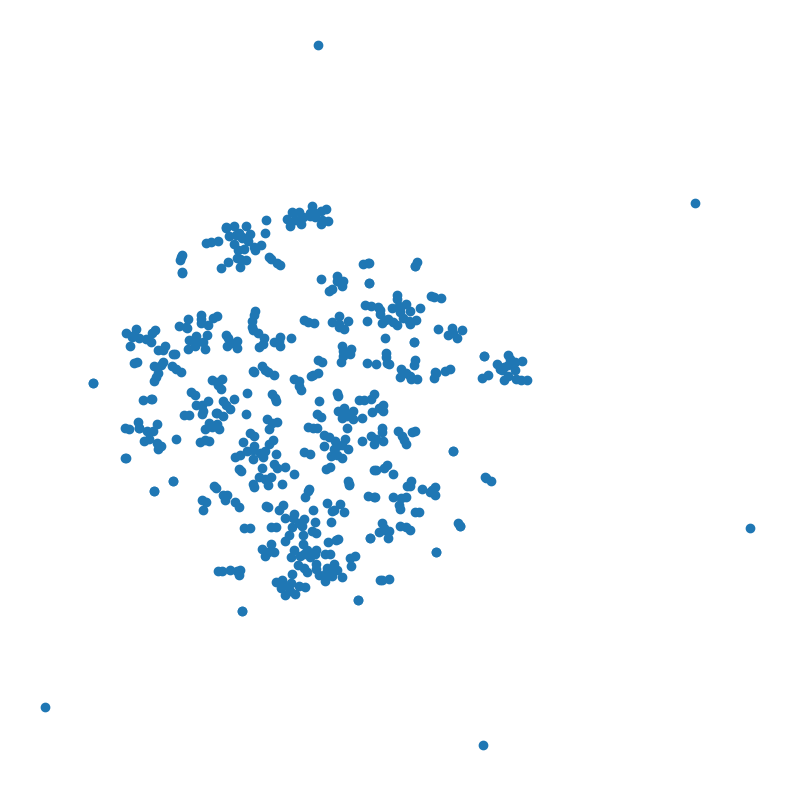

In [141]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)
ax.set_axis_off()
